In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)
a_shuffled[0]

array([0.62, 0.28])

In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

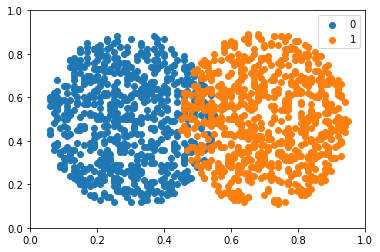

In [7]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [8]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    

    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

0.4

## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [9]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.0014799999999999924,
 -0.007120000000000004,
 -0.00044000000000000706,
 -0.00021999999999999797]

In [11]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    qc.cz(qr[0],qr[1])
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

0.4

In [12]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.0011800000000000033,
 -0.016659999999999998,
 -0.00021999999999999797,
 0.0007399999999999962]

## Two Qubit iteration with 100 data

### c1=0.01(small movement) delta=0.3+ (small fluctuation)

In [19]:
progress=[];

thdata=[];


l=[];
l1p=[];
l1m=[];
l1t=[];
l1=[];
c=[];

theta=[0,0,0,0];
c1=0.01   
delta=6    
ndata=5;
nshot=1;
l1p1=[0,0,0,0];
l1m1=[0,0,0,0];

for ep in range(4000):
    delta=random.random()+0.3
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    l1p1=[0,0,0,0];
    l1m1=[0,0,0,0];
    lo=0;
    for i in range(ndata):
        l1p=[];
        l1m=[];
        
        for j in range(4):
            
            l1p.append(lossCal2qubit(i,theta+np.array(c2[j]),nshot))
            l1m.append(lossCal2qubit(i,theta-np.array(c2[j]),nshot))
            
        lo=np.add(lo,lossCal2qubit(i,theta,nshot))
        
        l1p1=np.add(l1p1,l1p);
        
        l1m1=np.add(l1m1,l1m);
    
    SPSA=(l1p1-l1m1)/(2*delta);
    theta=theta-SPSA;
    thdata.append(theta)
    progress.append(lo)
    print(ep,"th iteration L=",lo)
    
 

0 th iteration L= 4.0
1 th iteration L= 10.0
2 th iteration L= 8.0
3 th iteration L= 6.0
4 th iteration L= 2.0
5 th iteration L= 4.0
6 th iteration L= 4.0
7 th iteration L= 4.0
8 th iteration L= 8.0
9 th iteration L= 4.0
10 th iteration L= 8.0
11 th iteration L= 4.0
12 th iteration L= 4.0
13 th iteration L= 2.0
14 th iteration L= 6.0
15 th iteration L= 6.0
16 th iteration L= 4.0
17 th iteration L= 6.0
18 th iteration L= 0.0
19 th iteration L= 4.0
20 th iteration L= 2.0
21 th iteration L= 10.0
22 th iteration L= 6.0
23 th iteration L= 8.0
24 th iteration L= 10.0
25 th iteration L= 8.0
26 th iteration L= 8.0
27 th iteration L= 2.0
28 th iteration L= 10.0
29 th iteration L= 0.0
30 th iteration L= 8.0
31 th iteration L= 10.0
32 th iteration L= 8.0
33 th iteration L= 10.0
34 th iteration L= 10.0
35 th iteration L= 4.0
36 th iteration L= 2.0
37 th iteration L= 6.0
38 th iteration L= 8.0
39 th iteration L= 6.0
40 th iteration L= 6.0
41 th iteration L= 6.0
42 th iteration L= 8.0
43 th iteratio

346 th iteration L= 4.0
347 th iteration L= 8.0
348 th iteration L= 8.0
349 th iteration L= 2.0
350 th iteration L= 6.0
351 th iteration L= 8.0
352 th iteration L= 10.0
353 th iteration L= 2.0
354 th iteration L= 10.0
355 th iteration L= 0.0
356 th iteration L= 2.0
357 th iteration L= 0.0
358 th iteration L= 0.0
359 th iteration L= 0.0
360 th iteration L= 4.0
361 th iteration L= 8.0
362 th iteration L= 0.0
363 th iteration L= 0.0
364 th iteration L= 0.0
365 th iteration L= 8.0
366 th iteration L= 4.0
367 th iteration L= 6.0
368 th iteration L= 0.0
369 th iteration L= 2.0
370 th iteration L= 10.0
371 th iteration L= 4.0
372 th iteration L= 8.0
373 th iteration L= 8.0
374 th iteration L= 6.0
375 th iteration L= 0.0
376 th iteration L= 2.0
377 th iteration L= 6.0
378 th iteration L= 4.0
379 th iteration L= 4.0
380 th iteration L= 0.0
381 th iteration L= 6.0
382 th iteration L= 8.0
383 th iteration L= 4.0
384 th iteration L= 6.0
385 th iteration L= 6.0
386 th iteration L= 8.0
387 th iterat

687 th iteration L= 2.0
688 th iteration L= 4.0
689 th iteration L= 4.0
690 th iteration L= 6.0
691 th iteration L= 2.0
692 th iteration L= 6.0
693 th iteration L= 10.0
694 th iteration L= 6.0
695 th iteration L= 8.0
696 th iteration L= 8.0
697 th iteration L= 8.0
698 th iteration L= 10.0
699 th iteration L= 8.0
700 th iteration L= 8.0
701 th iteration L= 6.0
702 th iteration L= 10.0
703 th iteration L= 10.0
704 th iteration L= 4.0
705 th iteration L= 8.0
706 th iteration L= 6.0
707 th iteration L= 10.0
708 th iteration L= 6.0
709 th iteration L= 8.0
710 th iteration L= 6.0
711 th iteration L= 8.0
712 th iteration L= 6.0
713 th iteration L= 6.0
714 th iteration L= 10.0
715 th iteration L= 4.0
716 th iteration L= 2.0
717 th iteration L= 6.0
718 th iteration L= 10.0
719 th iteration L= 6.0
720 th iteration L= 8.0
721 th iteration L= 0.0
722 th iteration L= 2.0
723 th iteration L= 10.0
724 th iteration L= 10.0
725 th iteration L= 8.0
726 th iteration L= 2.0
727 th iteration L= 10.0
728 th

1027 th iteration L= 4.0
1028 th iteration L= 8.0
1029 th iteration L= 4.0
1030 th iteration L= 2.0
1031 th iteration L= 8.0
1032 th iteration L= 0.0
1033 th iteration L= 2.0
1034 th iteration L= 0.0
1035 th iteration L= 4.0
1036 th iteration L= 6.0
1037 th iteration L= 8.0
1038 th iteration L= 8.0
1039 th iteration L= 6.0
1040 th iteration L= 10.0
1041 th iteration L= 10.0
1042 th iteration L= 6.0
1043 th iteration L= 0.0
1044 th iteration L= 6.0
1045 th iteration L= 8.0
1046 th iteration L= 2.0
1047 th iteration L= 4.0
1048 th iteration L= 6.0
1049 th iteration L= 8.0
1050 th iteration L= 8.0
1051 th iteration L= 6.0
1052 th iteration L= 6.0
1053 th iteration L= 2.0
1054 th iteration L= 2.0
1055 th iteration L= 2.0
1056 th iteration L= 8.0
1057 th iteration L= 2.0
1058 th iteration L= 2.0
1059 th iteration L= 6.0
1060 th iteration L= 10.0
1061 th iteration L= 6.0
1062 th iteration L= 6.0
1063 th iteration L= 4.0
1064 th iteration L= 4.0
1065 th iteration L= 6.0
1066 th iteration L= 0

1355 th iteration L= 10.0
1356 th iteration L= 0.0
1357 th iteration L= 2.0
1358 th iteration L= 0.0
1359 th iteration L= 4.0
1360 th iteration L= 0.0
1361 th iteration L= 2.0
1362 th iteration L= 4.0
1363 th iteration L= 0.0
1364 th iteration L= 8.0
1365 th iteration L= 4.0
1366 th iteration L= 6.0
1367 th iteration L= 6.0
1368 th iteration L= 2.0
1369 th iteration L= 2.0
1370 th iteration L= 8.0
1371 th iteration L= 8.0
1372 th iteration L= 8.0
1373 th iteration L= 2.0
1374 th iteration L= 6.0
1375 th iteration L= 8.0
1376 th iteration L= 10.0
1377 th iteration L= 4.0
1378 th iteration L= 10.0
1379 th iteration L= 2.0
1380 th iteration L= 4.0
1381 th iteration L= 6.0
1382 th iteration L= 0.0
1383 th iteration L= 2.0
1384 th iteration L= 4.0
1385 th iteration L= 0.0
1386 th iteration L= 0.0
1387 th iteration L= 2.0
1388 th iteration L= 8.0
1389 th iteration L= 8.0
1390 th iteration L= 6.0
1391 th iteration L= 2.0
1392 th iteration L= 2.0
1393 th iteration L= 10.0
1394 th iteration L= 

1682 th iteration L= 6.0
1683 th iteration L= 0.0
1684 th iteration L= 4.0
1685 th iteration L= 8.0
1686 th iteration L= 6.0
1687 th iteration L= 0.0
1688 th iteration L= 2.0
1689 th iteration L= 2.0
1690 th iteration L= 4.0
1691 th iteration L= 6.0
1692 th iteration L= 8.0
1693 th iteration L= 8.0
1694 th iteration L= 0.0
1695 th iteration L= 10.0
1696 th iteration L= 2.0
1697 th iteration L= 6.0
1698 th iteration L= 4.0
1699 th iteration L= 6.0
1700 th iteration L= 2.0
1701 th iteration L= 4.0
1702 th iteration L= 6.0
1703 th iteration L= 0.0
1704 th iteration L= 8.0
1705 th iteration L= 4.0
1706 th iteration L= 10.0
1707 th iteration L= 8.0
1708 th iteration L= 4.0
1709 th iteration L= 4.0
1710 th iteration L= 0.0
1711 th iteration L= 2.0
1712 th iteration L= 6.0
1713 th iteration L= 6.0
1714 th iteration L= 6.0
1715 th iteration L= 8.0
1716 th iteration L= 8.0
1717 th iteration L= 8.0
1718 th iteration L= 10.0
1719 th iteration L= 10.0
1720 th iteration L= 6.0
1721 th iteration L= 

2009 th iteration L= 2.0
2010 th iteration L= 8.0
2011 th iteration L= 8.0
2012 th iteration L= 8.0
2013 th iteration L= 4.0
2014 th iteration L= 6.0
2015 th iteration L= 4.0
2016 th iteration L= 4.0
2017 th iteration L= 0.0
2018 th iteration L= 6.0
2019 th iteration L= 6.0
2020 th iteration L= 6.0
2021 th iteration L= 2.0
2022 th iteration L= 0.0
2023 th iteration L= 0.0
2024 th iteration L= 6.0
2025 th iteration L= 4.0
2026 th iteration L= 0.0
2027 th iteration L= 2.0
2028 th iteration L= 8.0
2029 th iteration L= 6.0
2030 th iteration L= 6.0
2031 th iteration L= 0.0
2032 th iteration L= 4.0
2033 th iteration L= 8.0
2034 th iteration L= 4.0
2035 th iteration L= 4.0
2036 th iteration L= 8.0
2037 th iteration L= 0.0
2038 th iteration L= 10.0
2039 th iteration L= 0.0
2040 th iteration L= 4.0
2041 th iteration L= 10.0
2042 th iteration L= 8.0
2043 th iteration L= 8.0
2044 th iteration L= 4.0
2045 th iteration L= 4.0
2046 th iteration L= 8.0
2047 th iteration L= 8.0
2048 th iteration L= 6.

2336 th iteration L= 0.0
2337 th iteration L= 2.0
2338 th iteration L= 4.0
2339 th iteration L= 10.0
2340 th iteration L= 8.0
2341 th iteration L= 0.0
2342 th iteration L= 4.0
2343 th iteration L= 8.0
2344 th iteration L= 8.0
2345 th iteration L= 4.0
2346 th iteration L= 8.0
2347 th iteration L= 6.0
2348 th iteration L= 10.0
2349 th iteration L= 8.0
2350 th iteration L= 8.0
2351 th iteration L= 8.0
2352 th iteration L= 8.0
2353 th iteration L= 8.0
2354 th iteration L= 10.0
2355 th iteration L= 8.0
2356 th iteration L= 6.0
2357 th iteration L= 4.0
2358 th iteration L= 6.0
2359 th iteration L= 2.0
2360 th iteration L= 8.0
2361 th iteration L= 2.0
2362 th iteration L= 8.0
2363 th iteration L= 10.0
2364 th iteration L= 2.0
2365 th iteration L= 0.0
2366 th iteration L= 0.0
2367 th iteration L= 8.0
2368 th iteration L= 8.0
2369 th iteration L= 8.0
2370 th iteration L= 2.0
2371 th iteration L= 2.0
2372 th iteration L= 8.0
2373 th iteration L= 4.0
2374 th iteration L= 6.0
2375 th iteration L= 

2663 th iteration L= 8.0
2664 th iteration L= 4.0
2665 th iteration L= 6.0
2666 th iteration L= 2.0
2667 th iteration L= 10.0
2668 th iteration L= 10.0
2669 th iteration L= 4.0
2670 th iteration L= 10.0
2671 th iteration L= 6.0
2672 th iteration L= 8.0
2673 th iteration L= 0.0
2674 th iteration L= 0.0
2675 th iteration L= 8.0
2676 th iteration L= 2.0
2677 th iteration L= 10.0
2678 th iteration L= 6.0
2679 th iteration L= 6.0
2680 th iteration L= 2.0
2681 th iteration L= 4.0
2682 th iteration L= 0.0
2683 th iteration L= 4.0
2684 th iteration L= 4.0
2685 th iteration L= 8.0
2686 th iteration L= 2.0
2687 th iteration L= 2.0
2688 th iteration L= 0.0
2689 th iteration L= 4.0
2690 th iteration L= 10.0
2691 th iteration L= 6.0
2692 th iteration L= 8.0
2693 th iteration L= 4.0
2694 th iteration L= 4.0
2695 th iteration L= 0.0
2696 th iteration L= 4.0
2697 th iteration L= 4.0
2698 th iteration L= 4.0
2699 th iteration L= 2.0
2700 th iteration L= 2.0
2701 th iteration L= 8.0
2702 th iteration L=

2990 th iteration L= 4.0
2991 th iteration L= 8.0
2992 th iteration L= 8.0
2993 th iteration L= 6.0
2994 th iteration L= 6.0
2995 th iteration L= 2.0
2996 th iteration L= 0.0
2997 th iteration L= 2.0
2998 th iteration L= 6.0
2999 th iteration L= 6.0
3000 th iteration L= 0.0
3001 th iteration L= 0.0
3002 th iteration L= 4.0
3003 th iteration L= 4.0
3004 th iteration L= 8.0
3005 th iteration L= 8.0
3006 th iteration L= 0.0
3007 th iteration L= 8.0
3008 th iteration L= 6.0
3009 th iteration L= 2.0
3010 th iteration L= 6.0
3011 th iteration L= 6.0
3012 th iteration L= 4.0
3013 th iteration L= 2.0
3014 th iteration L= 2.0
3015 th iteration L= 8.0
3016 th iteration L= 4.0
3017 th iteration L= 2.0
3018 th iteration L= 0.0
3019 th iteration L= 0.0
3020 th iteration L= 4.0
3021 th iteration L= 8.0
3022 th iteration L= 10.0
3023 th iteration L= 8.0
3024 th iteration L= 6.0
3025 th iteration L= 4.0
3026 th iteration L= 6.0
3027 th iteration L= 10.0
3028 th iteration L= 2.0
3029 th iteration L= 0.

3318 th iteration L= 2.0
3319 th iteration L= 2.0
3320 th iteration L= 6.0
3321 th iteration L= 2.0
3322 th iteration L= 4.0
3323 th iteration L= 4.0
3324 th iteration L= 6.0
3325 th iteration L= 6.0
3326 th iteration L= 0.0
3327 th iteration L= 4.0
3328 th iteration L= 2.0
3329 th iteration L= 2.0
3330 th iteration L= 0.0
3331 th iteration L= 8.0
3332 th iteration L= 10.0
3333 th iteration L= 6.0
3334 th iteration L= 4.0
3335 th iteration L= 8.0
3336 th iteration L= 10.0
3337 th iteration L= 2.0
3338 th iteration L= 2.0
3339 th iteration L= 6.0
3340 th iteration L= 0.0
3341 th iteration L= 8.0
3342 th iteration L= 10.0
3343 th iteration L= 8.0
3344 th iteration L= 8.0
3345 th iteration L= 8.0
3346 th iteration L= 4.0
3347 th iteration L= 2.0
3348 th iteration L= 0.0
3349 th iteration L= 10.0
3350 th iteration L= 10.0
3351 th iteration L= 0.0
3352 th iteration L= 0.0
3353 th iteration L= 10.0
3354 th iteration L= 4.0
3355 th iteration L= 2.0
3356 th iteration L= 4.0
3357 th iteration L

3646 th iteration L= 2.0
3647 th iteration L= 2.0
3648 th iteration L= 2.0
3649 th iteration L= 8.0
3650 th iteration L= 0.0
3651 th iteration L= 4.0
3652 th iteration L= 2.0
3653 th iteration L= 6.0
3654 th iteration L= 10.0
3655 th iteration L= 6.0
3656 th iteration L= 2.0
3657 th iteration L= 2.0
3658 th iteration L= 2.0
3659 th iteration L= 6.0
3660 th iteration L= 8.0
3661 th iteration L= 8.0
3662 th iteration L= 8.0
3663 th iteration L= 6.0
3664 th iteration L= 2.0
3665 th iteration L= 2.0
3666 th iteration L= 8.0
3667 th iteration L= 8.0
3668 th iteration L= 0.0
3669 th iteration L= 10.0
3670 th iteration L= 4.0
3671 th iteration L= 2.0
3672 th iteration L= 8.0
3673 th iteration L= 8.0
3674 th iteration L= 2.0
3675 th iteration L= 2.0
3676 th iteration L= 2.0
3677 th iteration L= 4.0
3678 th iteration L= 6.0
3679 th iteration L= 4.0
3680 th iteration L= 8.0
3681 th iteration L= 4.0
3682 th iteration L= 4.0
3683 th iteration L= 2.0
3684 th iteration L= 8.0
3685 th iteration L= 0.

3973 th iteration L= 6.0
3974 th iteration L= 4.0
3975 th iteration L= 10.0
3976 th iteration L= 8.0
3977 th iteration L= 4.0
3978 th iteration L= 0.0
3979 th iteration L= 6.0
3980 th iteration L= 8.0
3981 th iteration L= 4.0
3982 th iteration L= 2.0
3983 th iteration L= 8.0
3984 th iteration L= 8.0
3985 th iteration L= 8.0
3986 th iteration L= 8.0
3987 th iteration L= 4.0
3988 th iteration L= 4.0
3989 th iteration L= 4.0
3990 th iteration L= 2.0
3991 th iteration L= 4.0
3992 th iteration L= 8.0
3993 th iteration L= 8.0
3994 th iteration L= 10.0
3995 th iteration L= 2.0
3996 th iteration L= 0.0
3997 th iteration L= 4.0
3998 th iteration L= 2.0
3999 th iteration L= 6.0


After 1000 iteration we have theta = [ 147.40793015   23.3374963   131.12518709 -146.65836241]


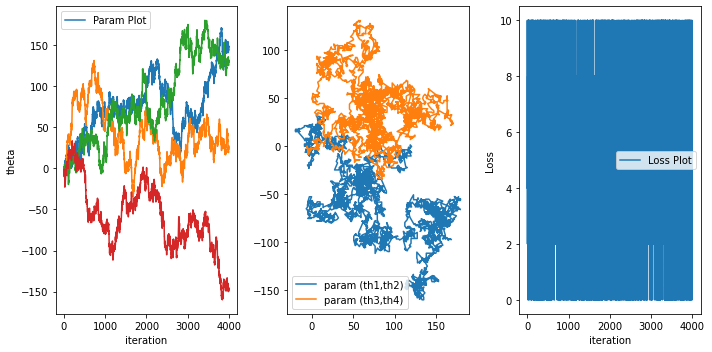

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [ ]:
progress=[];

thdata=[];


l=[];
l1p=[];
l1m=[];
l1t=[];
l1=[];
c=[];

theta=[0,0,0,0];
c1=0.01   
delta=6    
ndata=100;
nshot=1;
l1p1=[0,0,0,0];
l1m1=[0,0,0,0];

for ep in range(4000):
    delta=random.random()+0.3
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    l1p1=[0,0,0,0];
    l1m1=[0,0,0,0];
    lo=0;
    for i in range(ndata):
        l1p=[];
        l1m=[];
        
        for j in range(4):
            
            l1p.append(lossCal2qubit(i,theta+np.array(c2[j]),nshot))
            l1m.append(lossCal2qubit(i,theta-np.array(c2[j]),nshot))
            
        lo=np.add(lo,lossCal2qubit(i,theta,nshot))
        
        l1p1=np.add(l1p1,l1p);
        
        l1m1=np.add(l1m1,l1m);
    
    SPSA=(l1p1-l1m1)/(2*delta);
    theta=theta-SPSA;
    thdata.append(theta)
    progress.append(lo)
    print(ep,"th iteration L=",lo)
    

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()